# Data Science Final Project : Telco Customer Churn

Melakukan prediksi churn pada pelanggan sangat penting untuk dilakukan oleh perusahaan telekomunikasi  untuk dapat mempertahankan pelanggan yang dimiliki saat ini. Mendapatkan pelanggan baru tentunya lebih sulit daripada mempertahankan yang ada, oleh sebab itu perusahaan mencoba untuk mengembangkan model untuk melakukan prediksi pelanggan dengan pola seperti apa yang akan churn dan tidak churn kemudian membantu dalam mengambil tindakan yang sesuai.

Pada project ini akan dibangun sebuah model untuk melakukan prediksi terhadap pelanggan yang akan churn dengan melakukan analisis terhadap **Gender**, **Payment Method**, **Montly Charges** dan **Total Charges**.

Tahapan yang akan dilakukan adalah sebagai berikut:  
1. Data Reading
2. Data Preparation
3. Exploratory Data Analysis
4. Feature Importance
5. Feature Enginering
6. Modelling

In [ ]:
#Import library
import numpy as np
import pandas as pd

#Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import math
import math

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score 
from sklearn.metrics import mutual_info_score
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

# Data Reading

Data yang digunakan adalah data telco yang dapat diakses [disini](https://raw.githubusercontent.com/naomiachoo/data-science-project-one-voice/main/Dataset/Dataset10_Telco_Churn.csv?token=GHSAT0AAAAAAB7V33L5YKO3DRSKO5FMSSXYZAHIOJQ) 

Data ini memiliki 6 independen variabel sebagai berikut :     
1. customerID : Berisi informasi berupa nilai unik, dimana setiap pelanggan memiliki nilai customerID yang berbeda
2. gender : Berisi informasi jenis kelamin pelanggan, apakah female atau male
3. PaymentMethod :  Berisi informasi metode pembayaran pelanggan, terdapat 4 nilai unik yaitu Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)
4. MontlyCharges : Berisi nilai pembayaran pelanggan setiap bulan
5. TotalCharges : Berisi nilai total pembayaran pelanggan 

In [ ]:
telco_data = pd.read_csv('https://raw.githubusercontent.com/naomiachoo/data-science-project-one-voice/main/Dataset/Dataset10_Telco_Churn.csv?token=GHSAT0AAAAAAB7V33L5YKO3DRSKO5FMSSXYZAHIOJQ')
telco_data.head()

,customerID,gender,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Electronic check,70.70,151.65,Yes


##Data Preparation

In [ ]:
#check columns data type
data_type = pd.DataFrame(telco_data.dtypes).T.rename(index={0:'Columns Type'})
data_type

,customerID,gender,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Columns Type,object,object,object,float64,object,object


Setelah dilakukan pengecekan terhadap tipe data dari setiap kolom, didapatkan bahwa kolom TotalCharges bertipe data object. Kolom ini berisi angka-angka desimal, tentunya tipe data yang sesuai adalah float.

In [ ]:
#function to replace number separator
def replacee(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.' + s[i+1:]
    else :
        return s

Sebelum dilakukan konversi dari object ke float, perlu diperiksa apakah terdapat value yang memiliki separator "," 

Setelah diperiksa, apabila ada maka separator tersebut harus diubah ke "." untuk dapat dilakukan konversi ke tipe data float.

Penjelasan ini adalah untuk fungsi `replacee`

In [ ]:
#change the number separator
telco_data['TotalCharges'] = telco_data['TotalCharges'].apply(replacee)

In [ ]:
#convert TotalCharges dtype
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors = 'coerce')
print(telco_data['TotalCharges'].dtypes)

float64


In [ ]:
#check null values
null_val = data_type.append(pd.DataFrame(telco_data.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null_val

,customerID,gender,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Columns Type,object,object,object,float64,object,object
Amount of Null Values,0,0,0,0,11,0


In [ ]:
#check null values
null_val = null_val.append(pd.DataFrame(round(telco_data.isnull().sum()/telco_data.shape[0]*100,2)).T.rename(index={0:'Percentage null values'}))
null_val.T

,Columns Type,Amount of Null Values,Percentage null values
customerID,object,0,0.0
gender,object,0,0.0
PaymentMethod,object,0,0.0
MonthlyCharges,float64,0,0.0
TotalCharges,object,11,0.16
Churn,object,0,0.0


In [ ]:
def checking_null_values(dataset):
  """
  show null values and its percentage
  """
  print('Dimension of the dataset', dataset.shape)
  null_val = pd.DataFrame(dataset.dtypes).T.rename(index={0:'Columns Type'})
  null_val = null_val.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
  null_val = null_val.append(pd.DataFrame(round(dataset.isnull().sum()/dataset.shape[0]*100,2)).T.rename(index={0:'Percentage null values'}))
  return null_val.T

### Check Any Missing Values

In [ ]:
#exclude the unnamed variable
data = telco_data.iloc[:, 1:]

#show null values and its percentage
checking_null_values(data)

Dimension of the dataset (7043, 5)


,Columns Type,Amount of Null Values,Percentage null values
gender,object,0,0.0
PaymentMethod,object,0,0.0
MonthlyCharges,float64,0,0.0
TotalCharges,float64,11,0.16
Churn,object,0,0.0


Dilakukan pengecekan pada data dan terdapat 11 nilai null pada kolom TotalCharges

### Payment Method Denomination

In [ ]:
#unique element of PaymentMethod
telco_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Pada kolom PaymentMethod, terdapat value yang memiliki kata (automatic), kata ini terlalu panjang apabila dilakukan visualisasi nanti, oleh sebab itu akan dihilangkan.

In [ ]:
#remove (automatic) from payment method
telco_data['PaymentMethod'] = telco_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

### Remove Customer ID Column

In [ ]:
telco_data.drop(columns = 'customerID', inplace = True)

customerID tidak diperlukan karena tidak menjelaskan apakah pelanggan akan churn atau tidak.

In [ ]:
telco_data[telco_data['TotalCharges'].isnull()]

,gender,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,Bank transfer,52.55,NaN,No
753,Male,Mailed check,20.25,NaN,No
936,Female,Mailed check,80.85,NaN,No
1082,Male,Mailed check,25.75,NaN,No
1340,Female,Credit card,56.05,NaN,No
3331,Male,Mailed check,19.85,NaN,No
3826,Male,Mailed check,25.35,NaN,No
4380,Female,Mailed check,20.00,NaN,No
5218,Male,Mailed check,19.70,NaN,No
6670,Female,Mailed check,73.35,NaN,No


Pada data terdapat 11 baris yang memiliki TotalCharges 0, tidak ada informasi lain dari data yang mendukung mengapa TotalCharges yang null harus diganti nilai nya atau harus dihapus, namun mempertahankan nilai null akan mempengaruhi dalam melakukan pemodelan, oleh sebab itu kami memutuskan untuk menghapus nilai null tersebut.

In [ ]:
# drop null values
telco_data = telco_data.dropna()

#show null values and its percentage
checking_null_values(telco_data)

Dimension of the dataset (7032, 5)


,Columns Type,Amount of Null Values,Percentage null values
gender,object,0,0.0
PaymentMethod,object,0,0.0
MonthlyCharges,float64,0,0.0
TotalCharges,float64,0,0.0
Churn,object,0,0.0


#Exploratory Data Analysis

### Data Visualization
Pada bagian ini data akan dianalisis dengan melakukan visualisasi pada data

#### Response Variable

Pada bagian ini kami ingin melihat berapa banyak dan berapa persen hasil no dan yes pada data

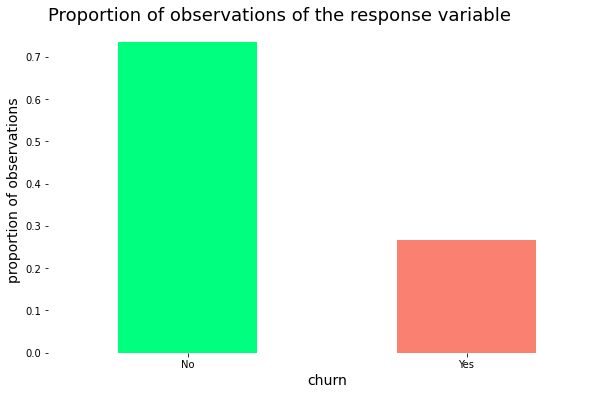

In [ ]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

data = telco_data['Churn']
# proportion of observation of each class
totals = data.value_counts(normalize=True)

# create a bar plot showing the percentage of churn
totals.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [ ]:
#count totals of response variable
df_response_total = pd.DataFrame(telco_data['Churn'].value_counts())

#Count the percentage
pd.set_option('display.float_format', '{:.2%}'.format)
df_response_percentage = pd.DataFrame(telco_data['Churn'].value_counts(normalize=True))

#concat the dataframe
df_concats = pd.concat([df_response_total,df_response_percentage], axis=1, join="inner")
df_concats.columns = ["Total", "Percentage"]

df_concats

,Total,Percentage
No,5163,73.42%
Yes,1869,26.58%


Setelah melakukan observasi terhadap response variable kita mendapatkan bahwa terdapat customer yang churn dan tidak churn.

Mayoritas customer tidak melakukan churn dengan persentasi 73,46%, sedangkan yang churn adalah 26,54%

#### Numerical Variables



Pada bagian ini, dengan variabel numerical yaitu MontlyCharges dan TotalCharges kami ingin melihat bagaimana pengaruh kedua variabel tersebut pada churn atau tidaknya pelanggan

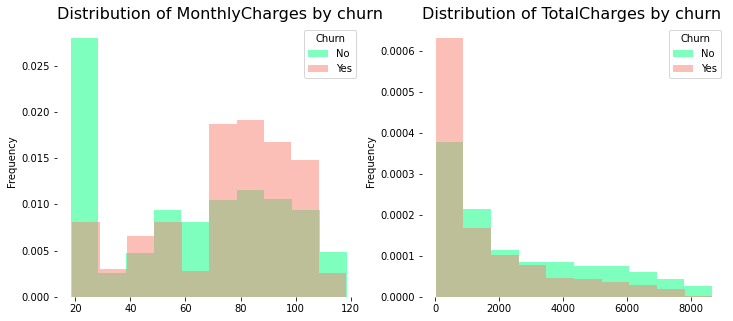

In [ ]:
def histogram_plots(columns_to_plot, super_title):
    
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)

    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        telco_data[telco_data['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        telco_data[telco_data['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# customer account column names
account_columns_numeric = ['MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, '')

Berdasarkan analisis pada Monthly Charges dan Total Charges maka didapatkan beberapa kesimpulan yaitu : 

* Semakin besar monthly charges maka probabilitas churn juga mayoritas akan semakin tinggi
* Customer dengan total charges yang tinggi kemungkinan untuk churn semakin rendah

#### Categorical Variables

In [ ]:
data = telco_data
data.select_dtypes(include=['object']).columns.to_list()

['gender', 'PaymentMethod', 'Churn']

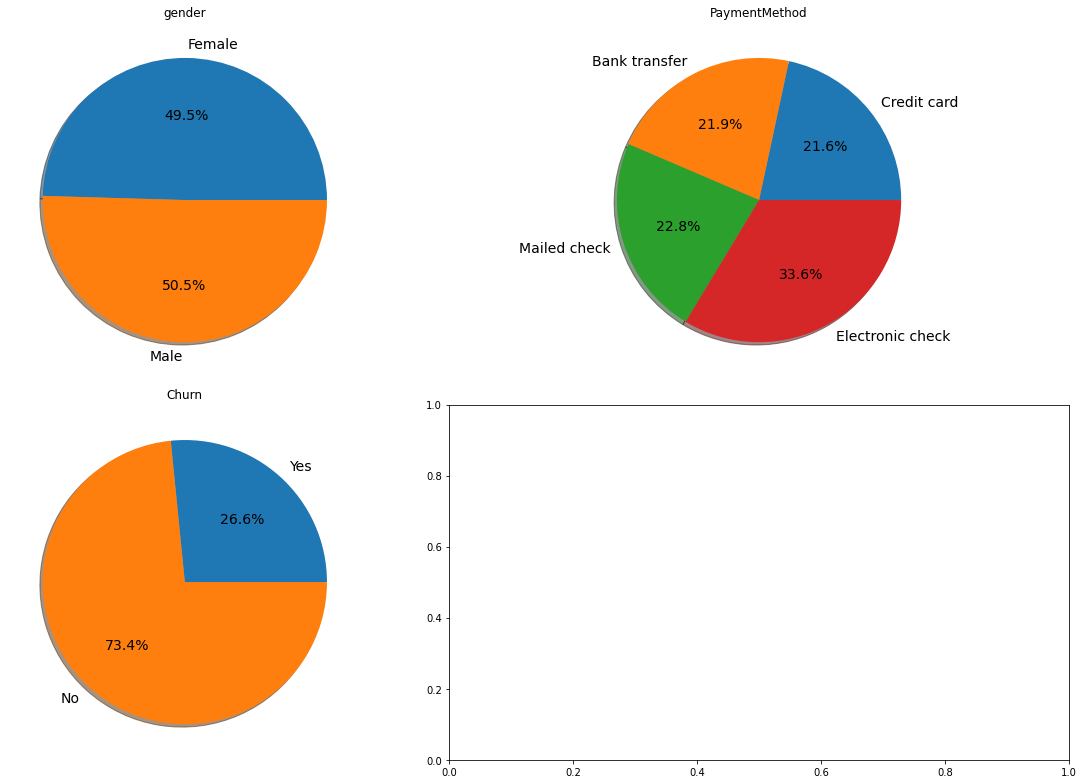

In [ ]:
cat_cols = ['gender', 'PaymentMethod', 'Churn']

fig, axes = plt.subplots(2,2, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

####Percentage of Churn for Gender Category

Pada bagian ini kami ingin melihat pengaruh variabel gender pada churn atau tidak nya pelanggan

Untuk menampilkan persentasi dari kategori gender, akan dibentuk cross-tabulation. Cross-tabulation adalah fungsi yang digunakan untuk menghitung frekuensi dari dua atau lebih faktor.

In [ ]:
cross_tab_prop_gender = pd.crosstab(index=data['gender'],
                             columns=data['Churn'],
                             normalize="index")
cross_tab_prop_gender

Churn,No,Yes
gender,,
Female,73.04%,26.96%
Male,73.80%,26.20%


In [ ]:
cross_tab_gender = pd.crosstab(index=data['gender'],
                        columns=data['Churn'])
cross_tab_gender

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


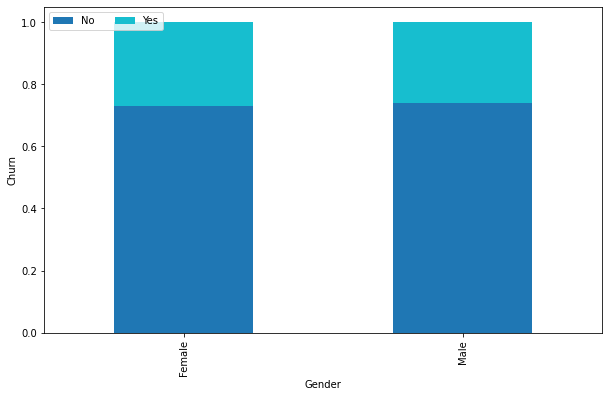

In [ ]:
cross_tab_prop_gender.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Churn")
plt.show()

Berdasarkan analisis pada persentasi churn terhadap gender maka didapatkan beberapa kesimpulan yaitu : 

* Baik perempuan dan laki-laki lebih dominan untuk tidak churn.

* Perempuan memiliki persentasi 73.04% untuk tidak churn 

* Laki-laki memiliki persentasi 73.80%	untuk tidak churn

#### Percentage of Churn for Payment Method Category

---



Pada bagian ini kami ingin melihat bagaimana pengaruh Payment Method pada churn atau tidak nya pelanggan.

In [ ]:
cross_tab_prop_pm = pd.crosstab(index=data['PaymentMethod'],
                             columns=data['Churn'],
                             normalize="index")
cross_tab_prop_pm

Churn,No,Yes
PaymentMethod,,
Bank transfer,83.27%,16.73%
Credit card,84.75%,15.25%
Electronic check,54.71%,45.29%
Mailed check,80.80%,19.20%


In [ ]:
cross_tab_pm = pd.crosstab(index=data['PaymentMethod'],
                        columns=data['Churn'])
cross_tab_pm

Churn,No,Yes
PaymentMethod,,
Bank transfer,1284,258
Credit card,1289,232
Electronic check,1294,1071
Mailed check,1296,308


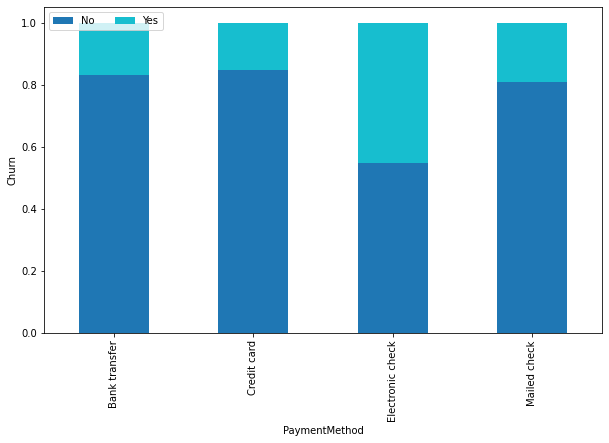

In [ ]:
cross_tab_prop_pm.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("PaymentMethod")
plt.ylabel("Churn")
plt.show()

Berdasarkan analisis pada persentasi churn terhadap payment method maka didapatkan beberapa kesimpulan yaitu : 

* Seluruh payment method memiliki persentasi yang dominan untuk tidak churn

* Bank transfer memiliki persentasi 83,27% untuk tidak churn 

* Credit card memiliki persentasi 84,75% untuk tidak churn

* Electronic check memiliki persentasi 54,71% untuk tidak churn

* Mailed check memiliki persentasi 80,80% untuk tidak churn

####Correlation for the numerical variables

Pada bagian ini kami ingin melihat bagaimana korelasi antar kedua variabel numerical.

In [ ]:
telco_data.corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,100.00%,65.11%
TotalCharges,65.11%,100.00%


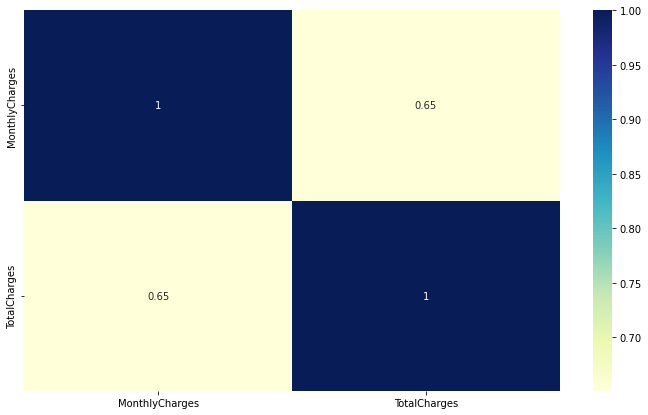

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(telco_data.corr(), cmap='YlGnBu', annot=True) 
plt.show()

Analisis ini menghasilkan bahwa korelasi antara Montly Charges dan Total Charges tidak terlalu besar hanya 0.65.

# Feature Importance

In [ ]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, telco_data.Churn)

# select categorial variables excluding the response variable 
categorical_variables = telco_data.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

PaymentMethod   4.44%
gender          0.00%
dtype: float64


Menggunakan Mutual Information selain membantu dalam memahami data, kita juga dapat mengidentifikasi variabel mana yang mempengaruhi target variabel yang ada pada data. 

Score yang dimiliki oleh variabel PaymentMethod dan gender, apabila semakin mendekati 0 maka dapat disimpulkan bahwa variabel tersebut tidak mempengaruhi variabel target.

Oleh sebab itu kita dapat menyimpulkan bahwa variabel PaymentMethod yang memiliki score 4,45% mempengaruhi hasil pada variabel target.

#Feature Enginering

Pda bagian ini fitur akan diekstraksi dan diubah menjadi format yang sesuai dengan model machine learning. 

Pada proyek ini variabel numerik dan kategorikal perlu diubah. Sebagian besar algoritma machine learning memerlukan nilai numerik, oleh sebab itu semua variabel kategorikal akan diubah menjadi label numerik sedangkan variabel numerik akan diubah menjadi skala umum. 

###Label encoding

Label encoding digunakan untuk mengubah nilai kategorikal dengan nilai numerical. Encoding ini mengubah setiap kategori dengan label numerical.

In [ ]:
telco_data_transformed = telco_data.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        telco_data_transformed[column] = telco_data_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        telco_data_transformed[column] = telco_data_transformed[column].map({'Yes': 1, 'No': 0}) 

In [ ]:
telco_data_transformed.head()

,gender,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Electronic check,2985.00%,2985.00%,0
1,0,Mailed check,5695.00%,188950.00%,0
2,0,Mailed check,5385.00%,10815.00%,1
3,0,Bank transfer,4230.00%,184075.00%,0
4,1,Electronic check,7070.00%,15165.00%,1


####One hot encoding

one hot encoding menciptakan kolom binary baru untuk setiap level dari variable kategorikal. Berisi 0 dan 1 untuk mengindikasikan ada atau tidak nya kategori pada data. One hot encoding diterapkan pada PaymentMethod pada penelitian ini.

In [ ]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
telco_data_transformed = pd.get_dummies(telco_data_transformed, columns = one_hot_encoding_columns)


In [ ]:
telco_data_transformed.head()

,gender,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,2985.00%,2985.00%,0,0,0,1,0
1,0,5695.00%,188950.00%,0,0,0,0,1
2,0,5385.00%,10815.00%,1,0,0,0,1
3,0,4230.00%,184075.00%,0,1,0,0,0
4,1,7070.00%,15165.00%,1,0,0,1,0


####Normalization

Normalisasi digunakan untuk mengubah kolom numerik menjadi nilai skala yang lebih umum.

In [ ]:
# min-max normalization (numeric variables)
min_max_columns = ['MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = telco_data_transformed[column].min()
        # maximum value of the column
        max_column = telco_data_transformed[column].max()
        # min max scaler
        telco_data_transformed[column] = (telco_data_transformed[column] - min_column) / (max_column - min_column)   


In [ ]:
telco_data_transformed.head()

,gender,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,11.54%,0.13%,0,0,0,1,0
1,0,38.51%,21.59%,0,0,0,0,1
2,0,35.42%,1.03%,1,0,0,0,1
3,0,23.93%,21.02%,0,1,0,0,0
4,1,52.19%,1.53%,1,0,0,1,0


In [ ]:
#exclude the unnamed variable
data = telco_data_transformed

#show null values and its percentage
checking_null_values(data)

Dimension of the dataset (7032, 8)


,Columns Type,Amount of Null Values,Percentage null values
gender,int64,0,0.00%
MonthlyCharges,float64,0,0.00%
TotalCharges,float64,0,0.00%
Churn,int64,0,0.00%
PaymentMethod_Bank transfer,uint8,0,0.00%
PaymentMethod_Credit card,uint8,0,0.00%
PaymentMethod_Electronic check,uint8,0,0.00%
PaymentMethod_Mailed check,uint8,0,0.00%


#Modelling

###Splitting data train & data test

In [ ]:
# select independent variables
X = telco_data_transformed.drop(columns='Churn')

# select dependent variables
y = telco_data_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [ ]:
#Perform train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) #fill the code

In [ ]:
def evaluation_metrics(model):
  """
  Evaluation metrics for classification ML project
  """
  y_predict_train = model.predict(X_train)
  y_predict_test = model.predict(X_test)

  training_acc = accuracy_score(y_train, y_predict_train) 
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {}".format(training_acc))
  print("Testing Accuracy: {}".format(testing_acc))

  print(classification_report(y_test, y_predict_test))

In [ ]:
# Evaluation metrics using ROC curve [Optional]
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

##Logistic Regression

In [ ]:
# Logistic Regression
lr = LogisticRegression() 
lr.fit(X_train, y_train) ## fill the code

evaluation_metrics(lr)

Training Accuracy: 0.7834666666666666
Testing Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1050
           1       0.61      0.45      0.51       357

    accuracy                           0.79      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



##Decision Tree

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) ## fill the code

evaluation_metrics(dt)

Training Accuracy: 0.9950222222222223
Testing Accuracy: 0.7235252309879175
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1050
           1       0.46      0.49      0.48       357

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.73      0.72      0.73      1407



##Gradient Boosting

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train) ## fill the code

evaluation_metrics(gb)

Training Accuracy: 0.8151111111111111
Testing Accuracy: 0.7803837953091685
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1050
           1       0.58      0.50      0.54       357

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

